In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report


In [29]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


We see in the EDA part, that the data is skewed in Na_to_K and the drug feature.

We also know from explorating the dataset, that there are **no missing values**.

So first, we make Na_to_K more symmetric using **log-transformation**
(in the EDA file, you can see at the end of the notebook the effect of this method)

In [20]:
# print out the original column
print(df['Na_to_K'])
print('\n')

# performing the log-transform and assigning back 
df['Na_to_K'] = np.log1p(df['Na_to_K'])

# print new values
print(df['Na_to_K'])

0      25.355
1      13.093
2      10.114
3       7.798
4      18.043
        ...  
195    11.567
196    12.006
197     9.894
198    14.020
199    11.349
Name: Na_to_K, Length: 200, dtype: float64


0      3.271658
1      2.645678
2      2.408206
3      2.174524
4      2.946700
         ...   
195    2.531074
196    2.565411
197    2.388212
198    2.709383
199    2.513575
Name: Na_to_K, Length: 200, dtype: float64


The next thing is **encoding**.

Encoding is important, because decision trees operate on categorical and numerical data differently.

Decision trees split data based on the values of features at decision points, and the way these splits are determined can be influenced by how the data is encoded.

So, for that purpose, I will use **Label-encoder**.

In [31]:
categorical_cols = ['Sex','BP','Cholesterol']
lb = LabelEncoder()
for column in categorical_cols:
    df[column] = lb.fit_transform(df[column])

df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [32]:
# in this step, we separate features and target variable
X = df.drop(columns=['Drug'])
y = df['Drug']

In [33]:
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# now we will resample the data, because Drug Y is more than the other drugs
smote = SMOTE().fit_resample(X_train, y_train)

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 1.0


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'BP <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'Age <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'BP <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

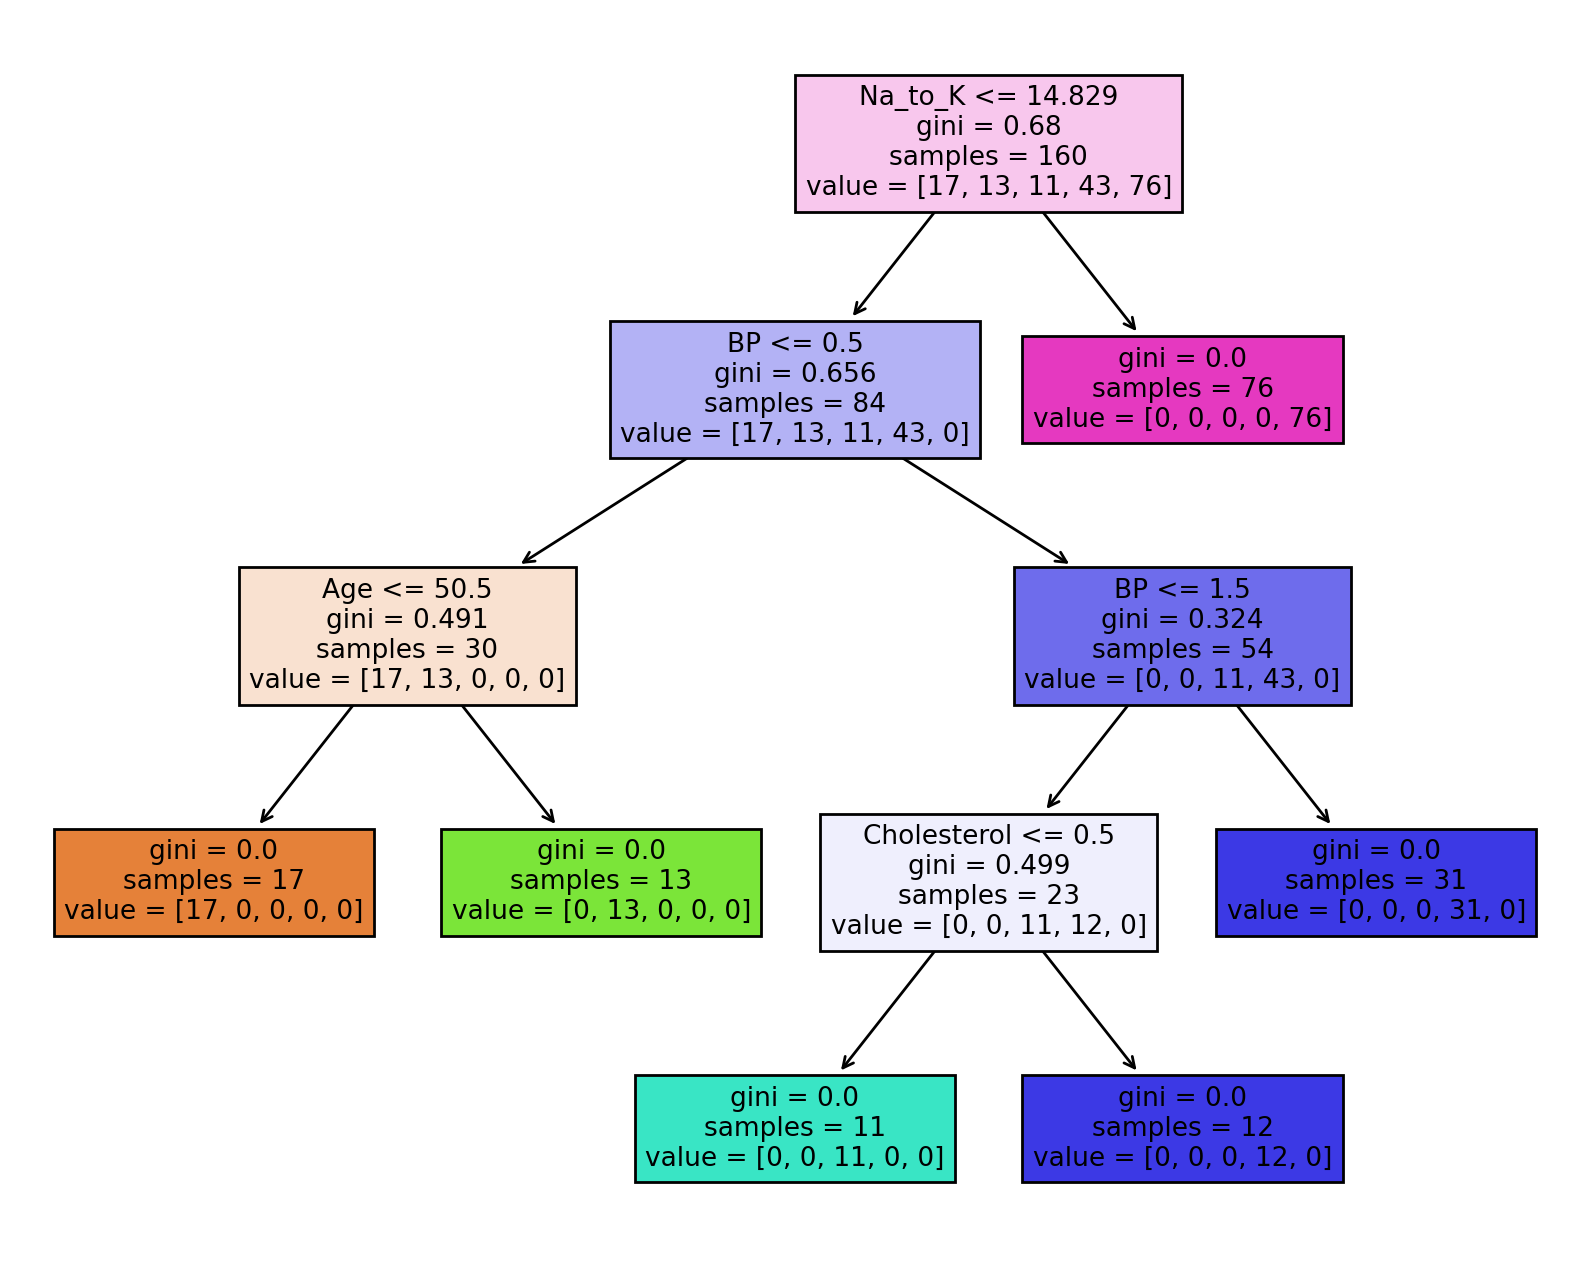

In [38]:
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(model, feature_names=df.columns, filled=True)